import os
import cv2
import numpy as np
data_dir = 'C:/Users/Admin/OneDrive/Desktop/CSE{AI&ML)Notes/lung_cancer/The IQ-OTHNCCD lung cancer dataset'

images = []
labels = []  

all_files = os.listdir(data_dir)
image_files = [file for file in all_files if file.endswith(".jpg") or file.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(data_dir, image_file)
    image = cv2.imread(image_path)
    

    image = cv2.resize(image, (256, 256))
    
    images.append(image)
images = np.array(images)





In [7]:
import os
import cv2
import random
import matplotlib.pyplot as plt

data_dir = 'C:/Users/Admin/OneDrive/Desktop/CSE{AI&ML)Notes/lung_cancer/The IQ-OTHNCCD lung cancer dataset'

def display_sample_images(data_dir, num_samples=5):
    classes = os.listdir(data_dir)

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            print(f"Class: {class_name}")
            image_files = os.listdir(class_dir)
            sample_files = random.sample(image_files, min(num_samples, len(image_files)))
            for sample_file in sample_files:
                image_path = os.path.join(class_dir, sample_file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
                plt.figure(figsize=(5, 5))
                plt.imshow(image)
                plt.title(f"Class: {class_name}")
                plt.axis('off')
                plt.show()

#display_sample_images(data_dir)


In [2]:
import os


data_dir = 'C:/Users/Admin/OneDrive/Desktop/CSE{AI&ML)Notes/lung_cancer/The IQ-OTHNCCD lung cancer dataset'

def count_images_per_class(data_dir):
    
    classes = os.listdir(data_dir)
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len(os.listdir(class_dir))
            print(f"Class: {class_name}, Number of Images: {num_images}")

print("Number of Images in Each Class:")
count_images_per_class(data_dir)


Number of Images in Each Class:
Class: Bengin cases, Number of Images: 120
Class: Malignant cases, Number of Images: 561
Class: Normal cases, Number of Images: 416


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = 'C:/Users/Admin/OneDrive/Desktop/CSE{AI&ML)Notes/lung_cancer/The IQ-OTHNCCD lung cancer dataset'

def preprocess_images(data_dir, img_size=(256, 256)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
            image = cv2.resize(image, img_size)  
            image = image.astype('float32') / 255.0  
            images.append(image)
            labels.append(i)  
            
    return np.array(images), np.array(labels)

images, labels = preprocess_images(data_dir)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% training, 20% validation


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    print(model.summary())
    return model

input_shape = (256, 256, 3) 
num_classes = 3 

model = create_model(input_shape, num_classes)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

model.save('cnn_model_for_lunghcancer.h5')  


F:\python codes\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4200 - loss: 1.9872 - val_accuracy: 0.5773 - val_loss: 0.8533
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7061 - loss: 0.7016 - val_accuracy: 0.7273 - val_loss: 0.6884
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8285 - loss: 0.4838 - val_accuracy: 0.8318 - val_loss: 0.4040
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9232 - loss: 0.2136 - val_accuracy: 0.8818 - val_loss: 0.3378
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9513 - loss: 0.1181 - val_accuracy: 0.9455 - val_loss: 0.1748
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9904 - loss: 0.0359 - val_accuracy: 0.9773 - val_loss: 0.0673
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9727 - val_loss: 0.0522
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9682 - val_

Test Accuracy: 0.9772727489471436


In [4]:
import os
import cv2
import numpy as np

test_data_dir = "C:/Users/Admin/OneDrive/Desktop/CSE{AI&ML)Notes/Testing_lungcancer_images"

def preprocess_test_images(test_data_dir, img_size=(256, 256)):
    test_images = []
    for root, dirs, files in os.walk(test_data_dir):
        for filename in files:
            if filename.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, filename)
                try:
                    image = cv2.imread(image_path)
                    if image is None:
                        print(f"Unable to read image: {image_path}")
                        continue
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
                    image = cv2.resize(image, img_size)  
                    image = image.astype('float32') / 255.0  
                    test_images.append(image)
                except Exception as e:
                    print(f"Error processing image {image_path}: {str(e)}")
    return np.array(test_images)

X_test_new = preprocess_test_images(test_data_dir)


In [8]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.load_model('cnn_model_for_lunghcancer.h5')
predictions = model.predict(X_test_new)
predicted_labels = np.argmax(predictions, axis=1)
custom_labels = ["Beginning", "Malignant", "Normal"]
num_beginning = np.sum(predicted_labels == 0)
num_malignant = np.sum(predicted_labels == 1)
num_normal = np.sum(predicted_labels == 2)
print("Number of Images in Each Test Class:")
print(f"Class: Beginning cases, Number of Images: {num_beginning}")
print(f"Class: Malignant cases, Number of Images: {num_malignant}")
print(f"Class: Normal cases, Number of Images: {num_normal}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step
Number of Images in Each Test Class:
Class: Beginning cases, Number of Images: 8
Class: Malignant cases, Number of Images: 105
Class: Normal cases, Number of Images: 84


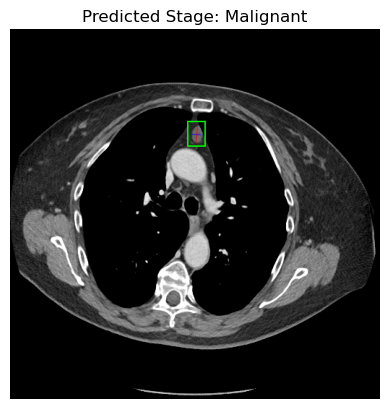

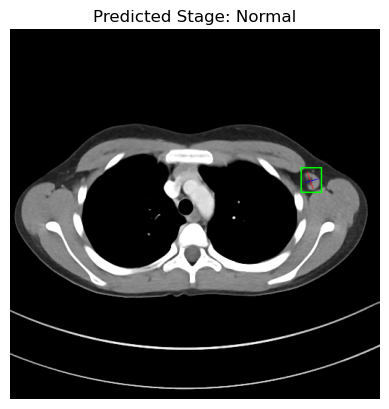

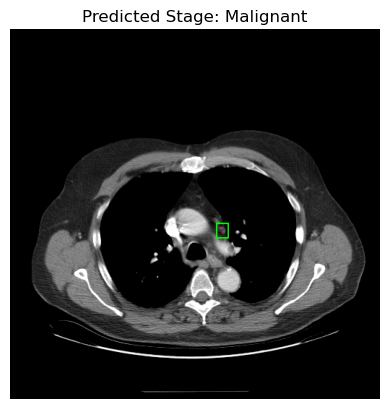

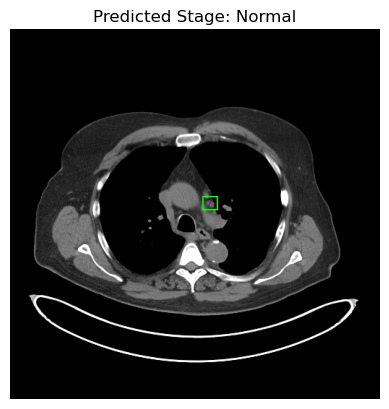

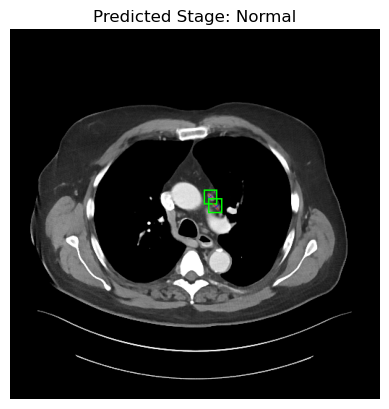

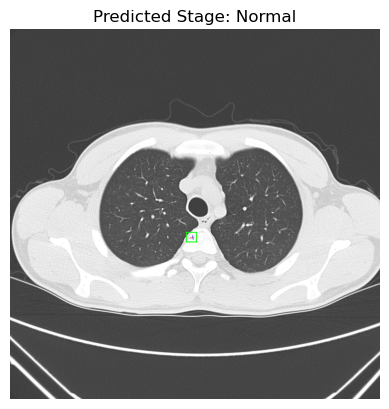

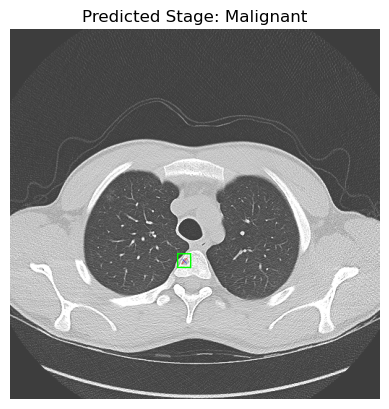

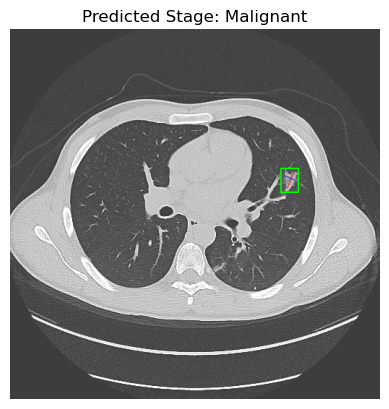

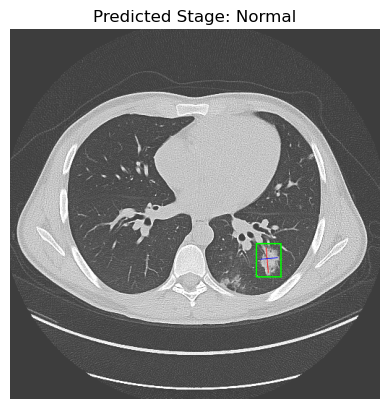

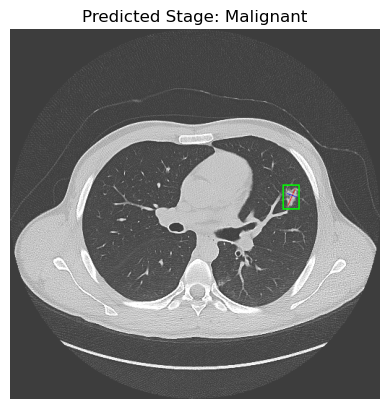

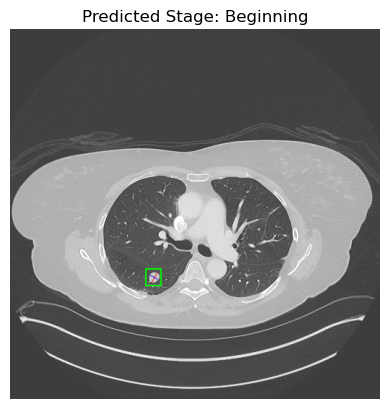

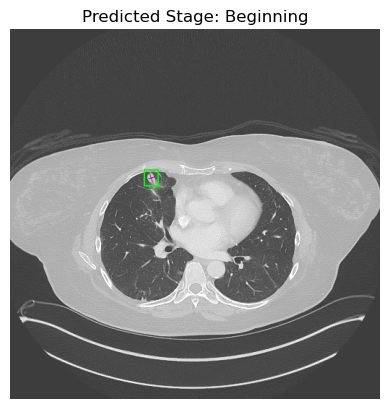

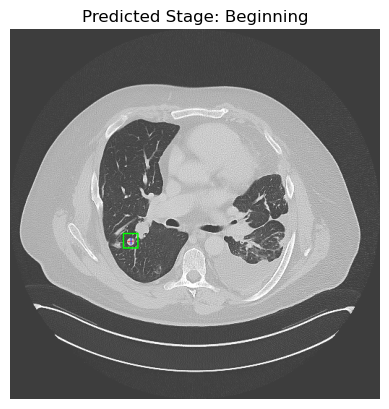

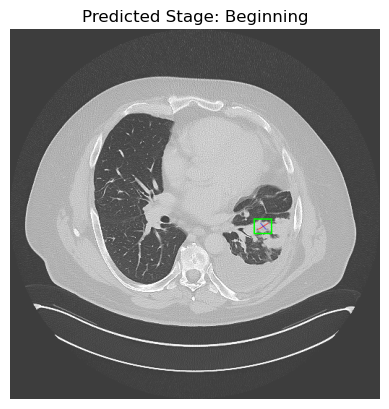

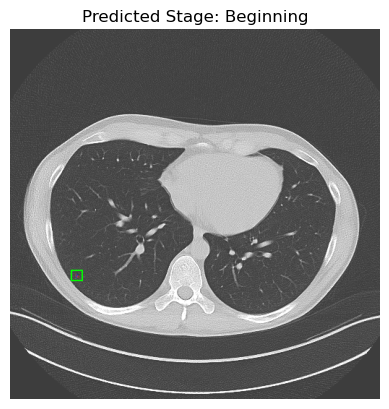

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_test_images(test_data_dir, predicted_labels, num_images_per_class=5):
    class_count = {0: 0, 1: 0, 2: 0}

    label_index = 0
    for root, dirs, files in os.walk(test_data_dir):
        for filename in files:
            if filename.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, filename)
                label = predicted_labels[label_index]
                if class_count[label] >= num_images_per_class:
                    label_index += 1
                    continue

                try:
                    image = cv2.imread(image_path)
                    if image is None:
                        print(f"Unable to read image: {image_path}")
                        label_index += 1
                        continue
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    class_count[label] += 1
                    stage = custom_labels[label]
                    plt.imshow(image)
                    plt.title(f"Predicted Stage: {stage}")
                    plt.axis('off')
                    plt.show()
                    label_index += 1
                    if all(count >= num_images_per_class for count in class_count.values()):
                        return

                except Exception as e:
                    print(f"Error processing image {image_path}: {str(e)}")
                    label_index += 1
visualize_test_images(test_data_dir, list(predicted_labels))
